In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline
import seaborn as see
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
see.set() # setting seaborn default for plots
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py


In [26]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
train.shape

(891, 12)

In [28]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",male,347082,G6,S
freq,1,577,7,4,644


In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [31]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
test.shape

(418, 11)

In [33]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Age: 418, non null 332
Cabin: 418, non null 91

In [11]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Missing Age: 86
Missing Cabin: 327
Missing Fare: 1

In [12]:
survived = train[train['Survived'] == 1]
not_survived = train[train['Survived'] == 0]
print ("Survived: %i (%.1f%%)" %(len(survived), float(len(survived))/len(train)*100.0))
print ("Not survived: %i (%.1f%%)"%(len(not_survived), float(len(not_survived))/len(train)*100.0))
print("Total: %i" %len(train))

Survived: 342 (38.4%)
Not survived: 549 (61.6%)
Total: 891


In [13]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Higher class passengers have better survival chance

In [15]:
train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [16]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Class 1 has the highest survival rate

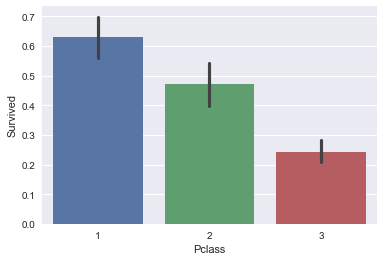

In [17]:
#train.groupby('Pclass').Survived.mean().plot(kind='bar')
see.barplot(x='Pclass', y='Survived', data=train)

In [18]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [19]:
train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

Females have better survival chance

In [20]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


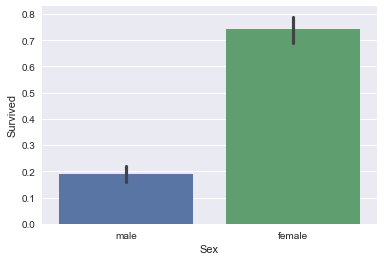

In [21]:
see.barplot(x='Sex', y='Survived', data=train)

In [22]:
tab = pd.crosstab(train['Pclass'], train['Sex'])
print (tab)

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


Text(0,0.5,'Percentage')

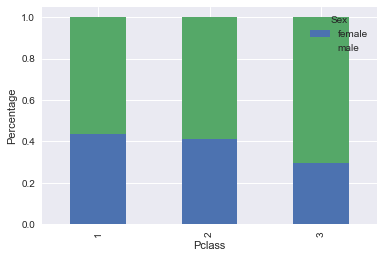

In [23]:
tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plot.xlabel('Pclass')
plot.ylabel('Percentage')

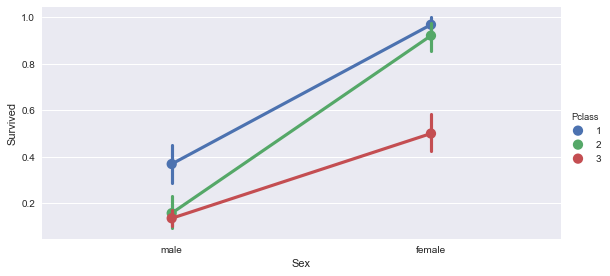

In [34]:
see.factorplot('Sex', 'Survived', hue='Pclass', size=4, aspect=2, data=train)

Women from 1st and 2nd Pclass have almost 100% survival chance
Menf rom 2nd and 3rd Pclass have only around 10% survival chance

In [37]:
train = train.drop(["Cabin", "PassengerId", "Ticket", "Name"], axis=1)
test = test.drop(["Cabin", "PassengerId", "Ticket", "Name"], axis=1)
train.head()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [118]:
sex = lambda x: 0.0 if x == b'male' else 1.0  # male = 0, female = 1
embarked = lambda x: 0.0 if x == b'C' else 1.0 if x == b'S' else 2.0 # C = 0, S = 1, Q = 2
data = np.genfromtxt(open("../data/train.csv"), delimiter=',', skip_header=1, usecols=(1, 2, 5, 6, 7, 8, 10, 12), converters={5: sex, 12: embarked})


In [63]:
class1 = data[:, 1] == 1
class2 = data[:, 1] == 2
class3 = data[:, 1] == 3
avg_age1 = np.nanmean(data[class1, 3])
avg_age2 = np.nanmean(data[class2, 3])
avg_age3 = np.nanmean(data[class3, 3])
nans = np.isnan(data[:, 3])
data[nans & class1, 3] = avg_age1
data[nans & class2, 3] = avg_age2
data[nans & class3, 3] = avg_age3

In [117]:
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(data): # loop over each fold
    
    train_data = data[train_index]
    test_data = data[test_index]
    
    train_y = train_data[:, 0]
    train_x = train_data[:, 1:]
    
    test_x = test_data[:, 1:]
    test_y = test_data[:, 0]

    model_tree = tree.DecisionTreeClassifier()
    model_tree = model_tree.fit(train_x, train_y)
    
    #print(model_tree.score(train_x, train_y))
    predictions = model_tree.predict(test_x)
    
    conf_matrix = confusion_matrix(test_y, predictions)
    tn, fp, fn, tp = confusion_matrix(test_y, predictions).ravel()
    
    print(model_tree.score(test_x, test_y))

    print('tn  fp  fn  tp')
    print((tn, fp, fn, tp))
    print()

0.770949720670391
tn  fp  fn  tp
(96, 24, 17, 42)

0.7808988764044944
tn  fp  fn  tp
(84, 15, 24, 55)

0.8089887640449438
tn  fp  fn  tp
(92, 17, 17, 52)

0.7865168539325843
tn  fp  fn  tp
(93, 13, 25, 47)

0.7528089887640449
tn  fp  fn  tp
(86, 29, 15, 48)



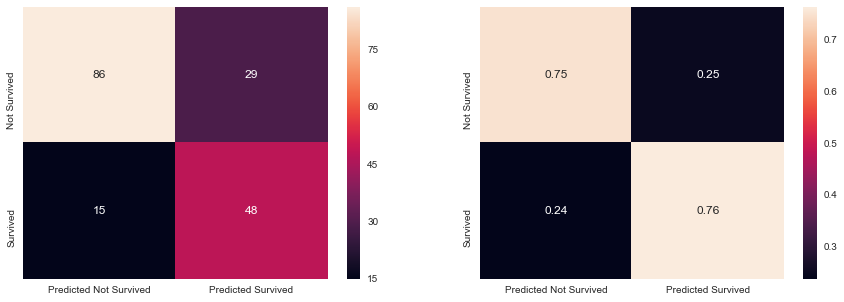

In [125]:
np.set_printoptions(precision=2)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
true_class_names = ['Not Survived', 'Survived']
predicted_class_names = ['Predicted Not Survived', 'Predicted Survived']

df_cnf_matrix = pd.DataFrame(conf_matrix, 
                             index = true_class_names,
                             columns = predicted_class_names)
df_cnf_matrix_percent = pd.DataFrame(conf_matrix_percent, 
                                     index = true_class_names,
                                     columns = predicted_class_names)
plot.figure(figsize = (15,5))

plot.subplot(121)
see.heatmap(df_cnf_matrix, annot=True, fmt='d')

plot.subplot(122)
see.heatmap(df_cnf_matrix_percent, annot=True)